# Introdução

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/Pulsar.csv')
df

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [ ]:
df['Class'].value_counts()

,count
Class,
0,16259
1,1639


In [ ]:
1639/17898

0.09157447759526204

In [ ]:
df

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


# Análise estatística básica

In [ ]:
df.describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


# Experimentos

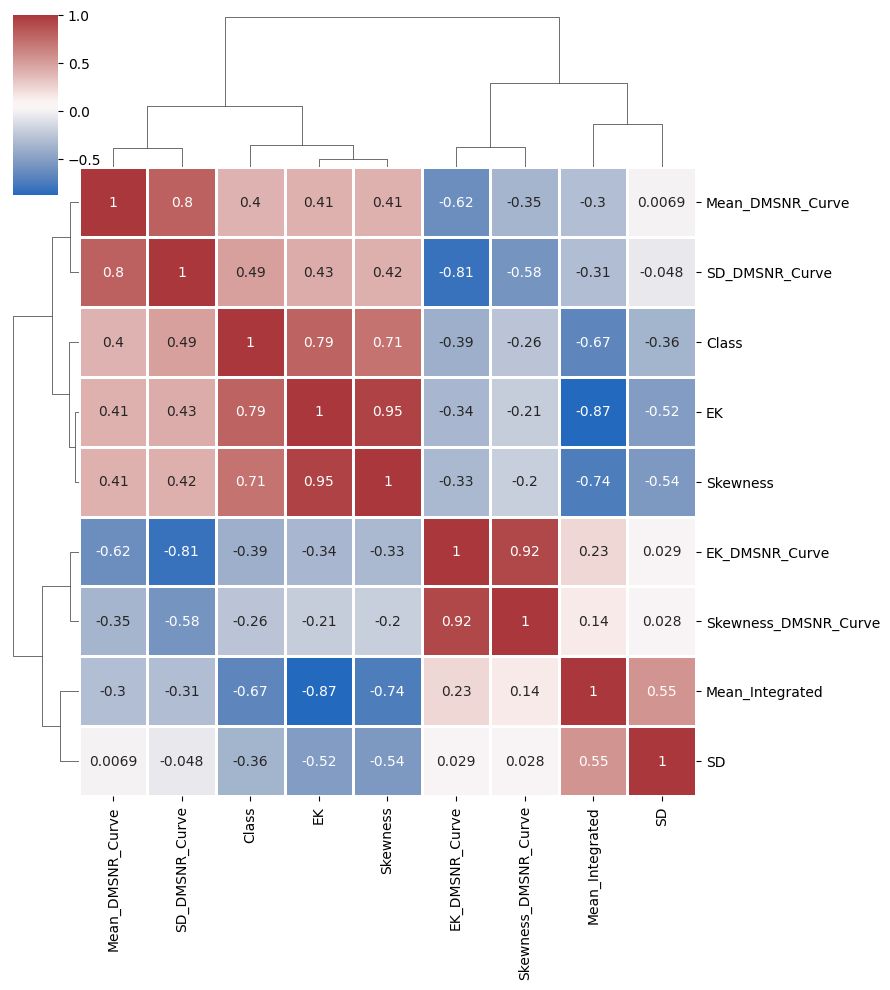

In [ ]:
sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

In [ ]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [ ]:
#Normalizando dataset

sc = StandardScaler()
X = sc.fit_transform(df)
X = pd.DataFrame(X, columns=df.columns)
X.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438,-0.317499
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581,-0.317499
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373,-0.317499
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300,-0.317499
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794,-0.317499


In [ ]:
X = X.values

Aqui vale ressaltar que ainda não foi feita a limpeza dos dados para equilibrar as labels. Isso será feito futuramente para comparar os resultados.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (8949, 9)
X_test (8949, 9)
y_train (8949,)
y_test (8949,)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [ ]:
pipe = Pipeline([
    ('classifier', VotingClassifier([
        ('Regressão Logistica', LogisticRegression()),
        ('Árvore de Decisão', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
    ]))
])

In [ ]:
classifiers = ['Regressão Logistica', 'Árvore de Decisão', 'Random Forest']

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
def plot_confusion_matrix(y_true, y_pred, nome):

    cm = confusion_matrix(y_true, y_pred)
    group_names = ["Verdadeiro Positivo\n","Falso Negativo\n","Falso Positivo\n","Verdadeiro Negativo\n"]
    group_counts = ["{0:0.0f}\n".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2 , v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cm/np.sum(cm), annot=labels, fmt="", cmap='Blues')

    ax.set_xlabel('Classe Predita')
    ax.set_ylabel('Classe Real')
    ax.set_title(f'{nome}')
    plt.show()

Resultados do modelo de Regressão Logistica:
********************************
Acurácia: 0.9807262569832402
____________

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3248
           1       0.96      0.83      0.89       332

    accuracy                           0.98      3580
   macro avg       0.97      0.91      0.94      3580
weighted avg       0.98      0.98      0.98      3580


____________


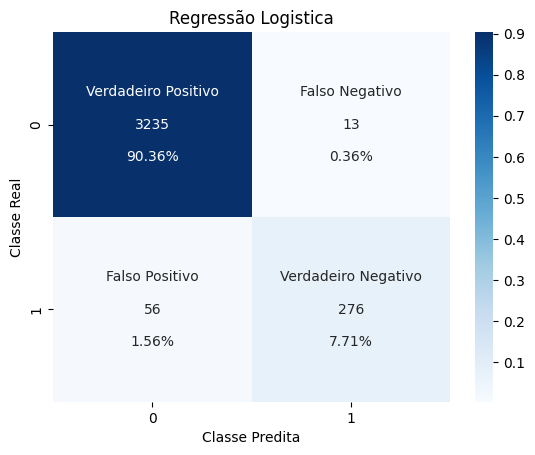



Resultados do modelo de Árvore de Decisão:
******************************
Acurácia: 0.9810055865921787
____________

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3248
           1       0.95      0.84      0.89       332

    accuracy                           0.98      3580
   macro avg       0.97      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580


____________


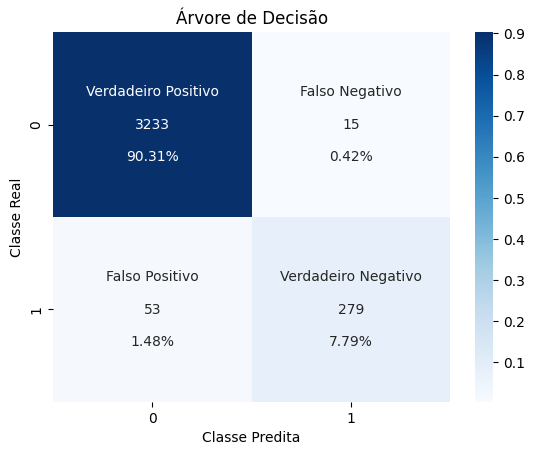



Resultados do modelo de Random Forest:
**************************
Acurácia: 0.9810055865921787
____________

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3248
           1       0.95      0.84      0.89       332

    accuracy                           0.98      3580
   macro avg       0.97      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580


____________


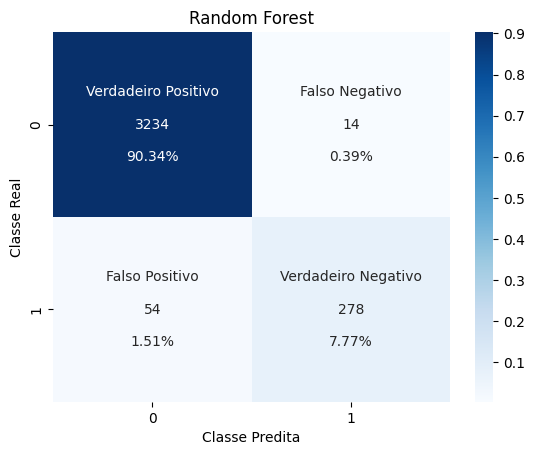

In [ ]:
for clf in classifiers:
    print(f"Resultados do modelo de {clf}:")

    estimators = [(name, model) for name, model in pipe.named_steps['classifier'].estimators if name == clf]
    pipe.named_steps['classifier'] = VotingClassifier(estimators)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    print("*"*(len(f"{clf}")+13))
    print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
    print("_"*12)
    print("")


    print(f"Relatório de Classificação:\n{classification_report(y_test, y_pred)}")
    print("")
    print("_"*12)

    plot_confusion_matrix(y_test, y_pred, clf)
    print("")
    print("")

In [ ]:
clf_RL = RandomForestClassifier()
clf_RL.fit(X_train, y_train)

clf_AD = DecisionTreeClassifier()
clf_AD.fit(X_train, y_train)

clf_RF = RandomForestClassifier()
clf_RF.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
def accuracy(h, m):
  cont = 0
  for i in range(len(h)):
    if h[i] == m.to_list()[i]:
      cont += 1

  return cont/len(h)

In [ ]:
!pip install fast_ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'Class',
                                                                            train_size=0.5, valid_size=0.3, test_size=0.2)


In [ ]:
clf_RL.fit(X_train, y_train)
clf_AD.fit(X_train, y_train)
clf_RF.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
pre1 = clf_RL.predict(X_valid)
pre2 = clf_AD.predict(X_valid)
pre3 = clf_RF.predict(X_valid)

0.9813745576457441


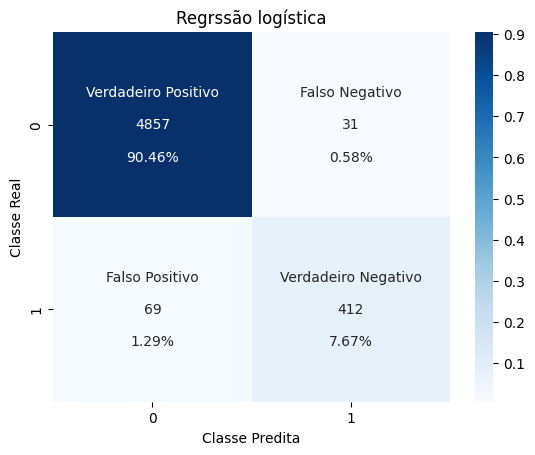

0.9681504935742223


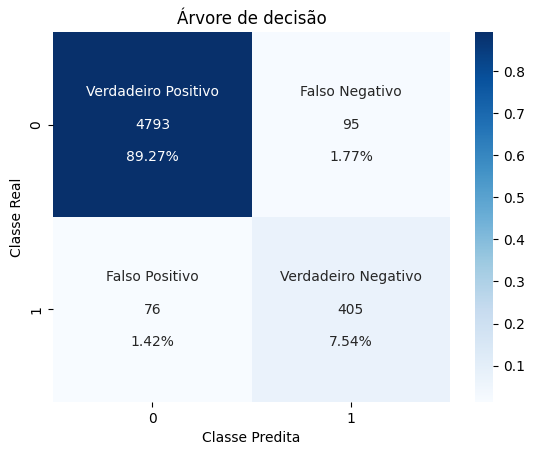

0.9811883032222015


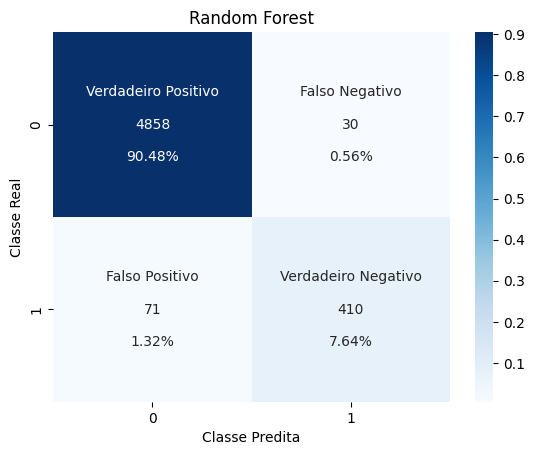

In [ ]:
lista = [pre1, pre2, pre3]

for i in range(len(lista)):
  print(accuracy(lista[i], y_valid))
  if i == 0:
    plot_confusion_matrix(y_valid, lista[i], 'Regrssão logística')
  elif i == 1:
    plot_confusion_matrix(y_valid, lista[i], 'Árvore de decisão')
  else:
    plot_confusion_matrix(y_valid, lista[i], 'Random Forest')

In [ ]:
pos1 = clf_RL.predict(X_test)
pos2 = clf_AD.predict(X_test)
pos3 = clf_RF.predict(X_test)

0.9798882681564246


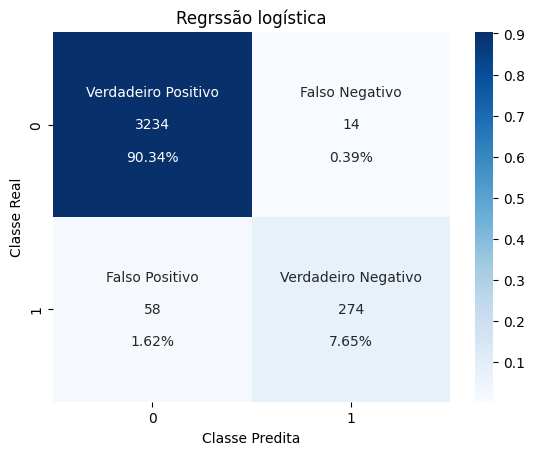

0.9631284916201117


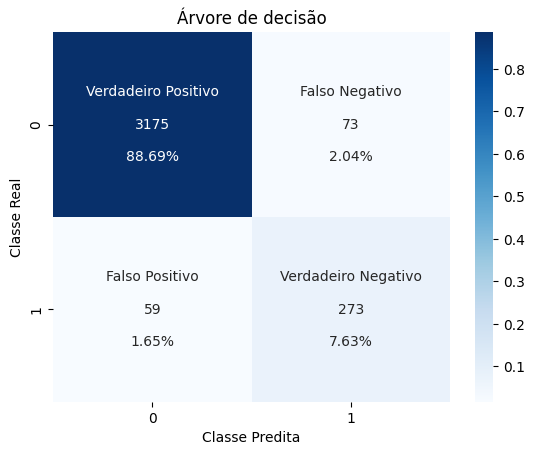

0.9812849162011174


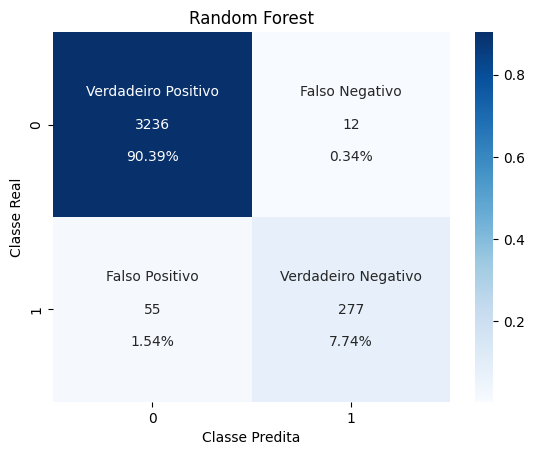

In [ ]:
lista2 = [pos1, pos2, pos3]

for i in range(len(lista2)):
  print(accuracy(lista2[i], y_test))
  if i == 0:
    plot_confusion_matrix(y_test, lista2[i], 'Regrssão logística')
  elif i == 1:
    plot_confusion_matrix(y_test, lista2[i], 'Árvore de decisão')
  else:
    plot_confusion_matrix(y_test, lista2[i], 'Random Forest')